# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:20<00:00, 2.94KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

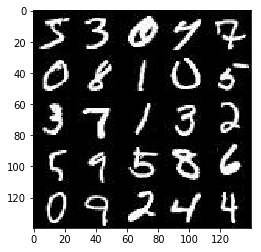

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

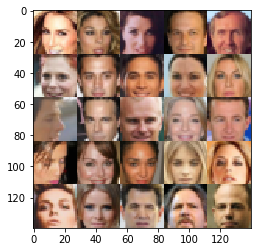

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


//anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'real_inputs') 
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='z_inputs') 
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [24]:
def discriminator(images, reuse=False, alpha=0.2, stddev=0.02):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer
        L1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        L1 = tf.maximum(alpha * L1, L1)
        # 14x14x64

        L2 = tf.layers.conv2d(L1, 128, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        L2 = tf.layers.batch_normalization(L2, training=True)
        L2 = tf.maximum(alpha * L2, L2)
        # 7x7x128

        L3 = tf.layers.conv2d(L2, 256, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        L3 = tf.layers.batch_normalization(L3, training=True)
        L3 = tf.maximum(alpha * L3, L3)
        # 4x4x256

        L4 = tf.layers.conv2d(L3, 512, 3, strides=2, padding='same')
        L4 = tf.layers.batch_normalization(L4, training=True)
        L4 = tf.maximum(alpha * L4, L4)
        # 2x2x512

        #         flat   = tf.reshape(L3, (-1, 4*4*256))
        flat   = tf.contrib.layers.flatten(L4)
        logits = tf.layers.dense(flat, 1)
        out    = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [25]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2, stddev=0.02):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # Fully connected
        L1 = tf.layers.dense(z, 2*2*512)
        
        # Start the convolution
        L1 = tf.reshape(L1, (-1, 2, 2, 512))
        L1 = tf.layers.batch_normalization(L1, training=is_train)
        L1 = tf.maximum(alpha * L1, L1)
        # 2x2x512

        L2 = tf.layers.conv2d_transpose(L1, 256, 3, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        L2 = tf.layers.batch_normalization(L2, training=is_train)
        L2 = tf.maximum(alpha * L2, L2)        
        # 4x4x256

        L3 = tf.layers.conv2d_transpose(L2, 128, 4, strides=1, padding='valid', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        L3 = tf.layers.batch_normalization(L3, training=is_train)
        L3 = tf.maximum(alpha * L3, L3)
        # 7x7x128
    
        L4 = tf.layers.conv2d_transpose(L3, 64, 3, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        L4 = tf.layers.batch_normalization(L4, training=is_train)
        L4 = tf.maximum(alpha * L4, L4)
        # 14x14x64
        
        logits = tf.layers.conv2d_transpose(L4, out_channel_dim, 5, strides=2, padding='same', kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        out    = tf.tanh(logits) 
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [26]:
def model_loss(input_real, input_z, out_channel_dim, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [27]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates  = [opt for opt in update_ops if opt.name.startswith('generator')]
    
    with tf.control_dependencies(g_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [29]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    # Set image dimensions
    _, image_width, image_height, image_channels = data_shape
    # Set model inputs
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    # Set model loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    # Set model optimization
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    samples, losses = [], []
    steps    = 0
    
    saver    = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images = batch_images * 2
                
                # Sample random noise for G
                sample_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: sample_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: sample_z, learn_rate: learning_rate}) 
            
                                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: sample_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: sample_z})
                    
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 30, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 6.3222... Generator Loss: 0.0036
Epoch 1/2... Discriminator Loss: 1.4529... Generator Loss: 0.5778
Epoch 1/2... Discriminator Loss: 0.5249... Generator Loss: 6.2519
Epoch 1/2... Discriminator Loss: 0.9392... Generator Loss: 4.1763
Epoch 1/2... Discriminator Loss: 1.0603... Generator Loss: 0.9838
Epoch 1/2... Discriminator Loss: 0.5073... Generator Loss: 4.2457
Epoch 1/2... Discriminator Loss: 0.4332... Generator Loss: 2.6537
Epoch 1/2... Discriminator Loss: 0.4212... Generator Loss: 4.9067
Epoch 1/2... Discriminator Loss: 0.5476... Generator Loss: 1.9124
Epoch 1/2... Discriminator Loss: 0.8172... Generator Loss: 1.3295


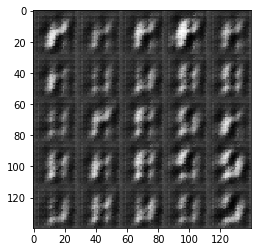

Epoch 1/2... Discriminator Loss: 0.5970... Generator Loss: 1.6115
Epoch 1/2... Discriminator Loss: 0.9139... Generator Loss: 3.3257
Epoch 1/2... Discriminator Loss: 0.4103... Generator Loss: 3.0344
Epoch 1/2... Discriminator Loss: 0.5923... Generator Loss: 2.1250
Epoch 1/2... Discriminator Loss: 0.6127... Generator Loss: 5.9784
Epoch 1/2... Discriminator Loss: 0.5492... Generator Loss: 2.1593
Epoch 1/2... Discriminator Loss: 0.4134... Generator Loss: 2.9883
Epoch 1/2... Discriminator Loss: 0.8011... Generator Loss: 1.3965
Epoch 1/2... Discriminator Loss: 0.6398... Generator Loss: 1.5833
Epoch 1/2... Discriminator Loss: 0.7066... Generator Loss: 1.6167


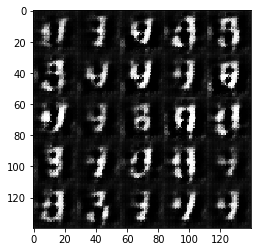

Epoch 1/2... Discriminator Loss: 0.5684... Generator Loss: 3.1397
Epoch 1/2... Discriminator Loss: 0.5677... Generator Loss: 2.0030
Epoch 1/2... Discriminator Loss: 0.4860... Generator Loss: 2.6173
Epoch 1/2... Discriminator Loss: 0.5841... Generator Loss: 2.3527
Epoch 1/2... Discriminator Loss: 0.7185... Generator Loss: 1.7071
Epoch 1/2... Discriminator Loss: 0.4804... Generator Loss: 2.7484
Epoch 1/2... Discriminator Loss: 0.7591... Generator Loss: 3.7060
Epoch 1/2... Discriminator Loss: 0.5603... Generator Loss: 2.1348
Epoch 1/2... Discriminator Loss: 1.3722... Generator Loss: 5.3394
Epoch 1/2... Discriminator Loss: 0.5872... Generator Loss: 2.0505


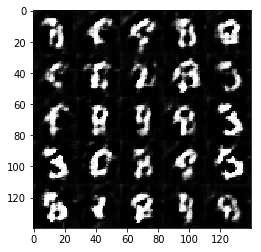

Epoch 1/2... Discriminator Loss: 0.6105... Generator Loss: 1.8115
Epoch 1/2... Discriminator Loss: 0.6448... Generator Loss: 2.3974
Epoch 1/2... Discriminator Loss: 0.5736... Generator Loss: 4.0282
Epoch 1/2... Discriminator Loss: 0.6644... Generator Loss: 1.7425
Epoch 1/2... Discriminator Loss: 0.7988... Generator Loss: 1.2036
Epoch 1/2... Discriminator Loss: 0.6084... Generator Loss: 3.1539
Epoch 1/2... Discriminator Loss: 0.6822... Generator Loss: 1.8869
Epoch 1/2... Discriminator Loss: 0.6068... Generator Loss: 2.0917
Epoch 1/2... Discriminator Loss: 0.8917... Generator Loss: 1.2385
Epoch 1/2... Discriminator Loss: 0.5875... Generator Loss: 2.2000


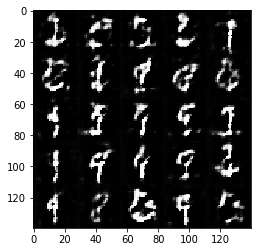

Epoch 1/2... Discriminator Loss: 0.7202... Generator Loss: 4.2462
Epoch 1/2... Discriminator Loss: 0.7902... Generator Loss: 1.3634
Epoch 1/2... Discriminator Loss: 0.6210... Generator Loss: 2.4402
Epoch 1/2... Discriminator Loss: 0.6752... Generator Loss: 2.3280
Epoch 1/2... Discriminator Loss: 0.6219... Generator Loss: 2.3264
Epoch 1/2... Discriminator Loss: 0.7426... Generator Loss: 1.6780
Epoch 1/2... Discriminator Loss: 0.6521... Generator Loss: 2.0468
Epoch 1/2... Discriminator Loss: 0.7151... Generator Loss: 1.7878
Epoch 1/2... Discriminator Loss: 0.7738... Generator Loss: 1.5350
Epoch 1/2... Discriminator Loss: 0.8422... Generator Loss: 1.3457


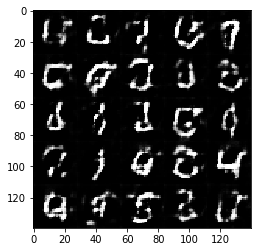

Epoch 1/2... Discriminator Loss: 0.8715... Generator Loss: 2.0040
Epoch 1/2... Discriminator Loss: 0.6370... Generator Loss: 1.8239
Epoch 1/2... Discriminator Loss: 0.7680... Generator Loss: 4.5071
Epoch 1/2... Discriminator Loss: 0.7270... Generator Loss: 1.5246
Epoch 1/2... Discriminator Loss: 0.6254... Generator Loss: 2.1286
Epoch 1/2... Discriminator Loss: 0.7533... Generator Loss: 1.5250
Epoch 1/2... Discriminator Loss: 0.9874... Generator Loss: 1.1222
Epoch 1/2... Discriminator Loss: 0.8152... Generator Loss: 1.2566
Epoch 1/2... Discriminator Loss: 0.6881... Generator Loss: 1.7689
Epoch 1/2... Discriminator Loss: 1.0099... Generator Loss: 3.7688


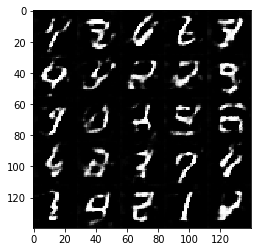

Epoch 1/2... Discriminator Loss: 0.7821... Generator Loss: 1.4387
Epoch 1/2... Discriminator Loss: 0.6839... Generator Loss: 1.7582
Epoch 1/2... Discriminator Loss: 0.6578... Generator Loss: 1.5833
Epoch 1/2... Discriminator Loss: 0.6698... Generator Loss: 1.9712
Epoch 1/2... Discriminator Loss: 0.7604... Generator Loss: 1.3108
Epoch 1/2... Discriminator Loss: 0.8576... Generator Loss: 1.1524
Epoch 1/2... Discriminator Loss: 0.6536... Generator Loss: 1.6921
Epoch 1/2... Discriminator Loss: 0.6990... Generator Loss: 1.6174
Epoch 1/2... Discriminator Loss: 0.8371... Generator Loss: 2.2742
Epoch 1/2... Discriminator Loss: 0.8995... Generator Loss: 0.9888


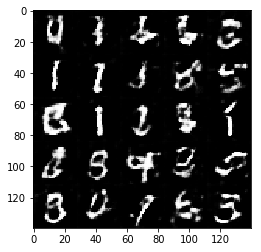

Epoch 1/2... Discriminator Loss: 1.2830... Generator Loss: 0.7954
Epoch 1/2... Discriminator Loss: 1.0052... Generator Loss: 0.8623
Epoch 1/2... Discriminator Loss: 0.6788... Generator Loss: 2.1023
Epoch 1/2... Discriminator Loss: 0.6138... Generator Loss: 2.1091
Epoch 1/2... Discriminator Loss: 0.9919... Generator Loss: 2.5952
Epoch 1/2... Discriminator Loss: 0.6199... Generator Loss: 1.6698
Epoch 1/2... Discriminator Loss: 0.6511... Generator Loss: 2.0023
Epoch 1/2... Discriminator Loss: 0.8720... Generator Loss: 1.1881
Epoch 1/2... Discriminator Loss: 0.8012... Generator Loss: 1.7276
Epoch 1/2... Discriminator Loss: 0.8410... Generator Loss: 1.1257


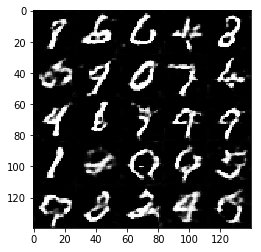

Epoch 1/2... Discriminator Loss: 0.7786... Generator Loss: 1.2487
Epoch 1/2... Discriminator Loss: 0.6555... Generator Loss: 1.7378
Epoch 1/2... Discriminator Loss: 0.7029... Generator Loss: 3.3589
Epoch 1/2... Discriminator Loss: 0.8458... Generator Loss: 3.5529
Epoch 1/2... Discriminator Loss: 0.7405... Generator Loss: 2.1837
Epoch 1/2... Discriminator Loss: 0.9791... Generator Loss: 1.4521
Epoch 1/2... Discriminator Loss: 0.9236... Generator Loss: 0.9455
Epoch 1/2... Discriminator Loss: 0.7869... Generator Loss: 1.1681
Epoch 1/2... Discriminator Loss: 0.7720... Generator Loss: 2.8158
Epoch 1/2... Discriminator Loss: 0.6452... Generator Loss: 1.8690


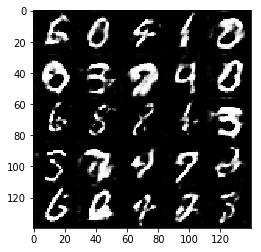

Epoch 1/2... Discriminator Loss: 1.0232... Generator Loss: 0.9430
Epoch 1/2... Discriminator Loss: 0.7614... Generator Loss: 1.2142
Epoch 1/2... Discriminator Loss: 0.7149... Generator Loss: 1.3966
Epoch 2/2... Discriminator Loss: 0.8246... Generator Loss: 1.1641
Epoch 2/2... Discriminator Loss: 0.7615... Generator Loss: 1.4589
Epoch 2/2... Discriminator Loss: 0.7068... Generator Loss: 1.4605
Epoch 2/2... Discriminator Loss: 0.7935... Generator Loss: 1.5330
Epoch 2/2... Discriminator Loss: 0.7044... Generator Loss: 1.4118
Epoch 2/2... Discriminator Loss: 0.8685... Generator Loss: 1.0934
Epoch 2/2... Discriminator Loss: 0.7523... Generator Loss: 1.6107


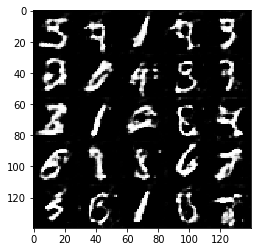

Epoch 2/2... Discriminator Loss: 0.8212... Generator Loss: 1.1039
Epoch 2/2... Discriminator Loss: 1.2312... Generator Loss: 0.6405
Epoch 2/2... Discriminator Loss: 0.7008... Generator Loss: 1.4888
Epoch 2/2... Discriminator Loss: 0.8218... Generator Loss: 1.0809
Epoch 2/2... Discriminator Loss: 1.3501... Generator Loss: 3.0823
Epoch 2/2... Discriminator Loss: 0.7245... Generator Loss: 1.8409
Epoch 2/2... Discriminator Loss: 0.7025... Generator Loss: 1.9212
Epoch 2/2... Discriminator Loss: 0.8653... Generator Loss: 1.0035
Epoch 2/2... Discriminator Loss: 0.6823... Generator Loss: 1.4978
Epoch 2/2... Discriminator Loss: 1.7607... Generator Loss: 3.8248


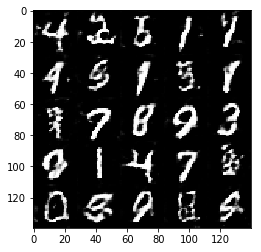

Epoch 2/2... Discriminator Loss: 0.6066... Generator Loss: 1.7792
Epoch 2/2... Discriminator Loss: 0.6829... Generator Loss: 1.6153
Epoch 2/2... Discriminator Loss: 0.6303... Generator Loss: 1.6555
Epoch 2/2... Discriminator Loss: 0.7229... Generator Loss: 1.8425
Epoch 2/2... Discriminator Loss: 0.6789... Generator Loss: 1.8728
Epoch 2/2... Discriminator Loss: 0.7540... Generator Loss: 1.5716
Epoch 2/2... Discriminator Loss: 0.8124... Generator Loss: 1.1935
Epoch 2/2... Discriminator Loss: 1.0511... Generator Loss: 0.8051
Epoch 2/2... Discriminator Loss: 1.3600... Generator Loss: 0.5463
Epoch 2/2... Discriminator Loss: 0.8579... Generator Loss: 1.0508


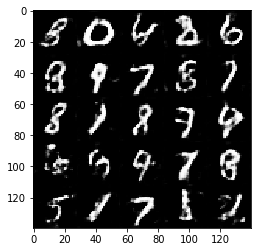

Epoch 2/2... Discriminator Loss: 1.5355... Generator Loss: 0.4302
Epoch 2/2... Discriminator Loss: 0.7098... Generator Loss: 1.8415
Epoch 2/2... Discriminator Loss: 1.1391... Generator Loss: 0.7051
Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.6630
Epoch 2/2... Discriminator Loss: 0.7217... Generator Loss: 1.7429
Epoch 2/2... Discriminator Loss: 1.0169... Generator Loss: 0.8164
Epoch 2/2... Discriminator Loss: 0.6741... Generator Loss: 1.7782
Epoch 2/2... Discriminator Loss: 1.2849... Generator Loss: 0.5857
Epoch 2/2... Discriminator Loss: 0.7336... Generator Loss: 1.9607
Epoch 2/2... Discriminator Loss: 0.7054... Generator Loss: 2.0527


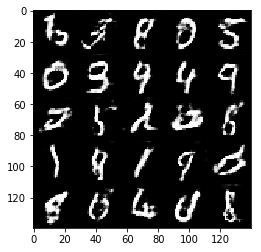

Epoch 2/2... Discriminator Loss: 0.7239... Generator Loss: 1.2780
Epoch 2/2... Discriminator Loss: 0.8688... Generator Loss: 1.1270
Epoch 2/2... Discriminator Loss: 0.6539... Generator Loss: 2.5040
Epoch 2/2... Discriminator Loss: 0.7635... Generator Loss: 1.2385
Epoch 2/2... Discriminator Loss: 0.9315... Generator Loss: 1.0516
Epoch 2/2... Discriminator Loss: 0.7477... Generator Loss: 2.2687
Epoch 2/2... Discriminator Loss: 0.8575... Generator Loss: 0.9872
Epoch 2/2... Discriminator Loss: 0.6801... Generator Loss: 1.3589
Epoch 2/2... Discriminator Loss: 0.5547... Generator Loss: 2.0079
Epoch 2/2... Discriminator Loss: 0.9374... Generator Loss: 2.7624


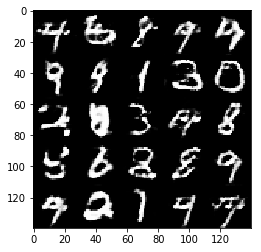

Epoch 2/2... Discriminator Loss: 0.7750... Generator Loss: 1.3195
Epoch 2/2... Discriminator Loss: 1.0992... Generator Loss: 0.7422
Epoch 2/2... Discriminator Loss: 1.3810... Generator Loss: 0.5055
Epoch 2/2... Discriminator Loss: 1.1515... Generator Loss: 0.6628
Epoch 2/2... Discriminator Loss: 1.0187... Generator Loss: 2.4157
Epoch 2/2... Discriminator Loss: 0.9161... Generator Loss: 2.0533
Epoch 2/2... Discriminator Loss: 0.7983... Generator Loss: 1.1289
Epoch 2/2... Discriminator Loss: 1.0644... Generator Loss: 0.7847
Epoch 2/2... Discriminator Loss: 0.7793... Generator Loss: 1.5938
Epoch 2/2... Discriminator Loss: 0.6687... Generator Loss: 1.4607


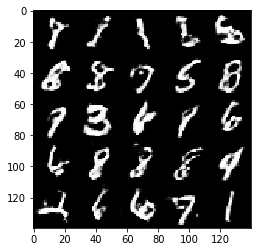

Epoch 2/2... Discriminator Loss: 1.0318... Generator Loss: 0.8081
Epoch 2/2... Discriminator Loss: 0.7273... Generator Loss: 1.2951
Epoch 2/2... Discriminator Loss: 0.6182... Generator Loss: 1.5566
Epoch 2/2... Discriminator Loss: 0.7346... Generator Loss: 1.2246
Epoch 2/2... Discriminator Loss: 0.9502... Generator Loss: 0.9660
Epoch 2/2... Discriminator Loss: 0.8711... Generator Loss: 3.2015
Epoch 2/2... Discriminator Loss: 0.8903... Generator Loss: 0.9843
Epoch 2/2... Discriminator Loss: 0.6100... Generator Loss: 1.6784
Epoch 2/2... Discriminator Loss: 0.9707... Generator Loss: 0.8812
Epoch 2/2... Discriminator Loss: 0.7948... Generator Loss: 1.9296


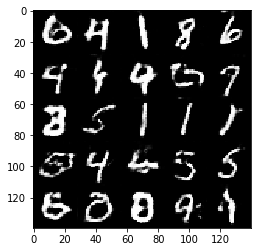

Epoch 2/2... Discriminator Loss: 1.0090... Generator Loss: 0.8075
Epoch 2/2... Discriminator Loss: 1.0910... Generator Loss: 0.9399
Epoch 2/2... Discriminator Loss: 0.9351... Generator Loss: 0.9068
Epoch 2/2... Discriminator Loss: 1.2137... Generator Loss: 0.7365
Epoch 2/2... Discriminator Loss: 0.6087... Generator Loss: 1.9388
Epoch 2/2... Discriminator Loss: 0.6257... Generator Loss: 1.4967
Epoch 2/2... Discriminator Loss: 0.5115... Generator Loss: 2.1889
Epoch 2/2... Discriminator Loss: 0.5363... Generator Loss: 2.1063
Epoch 2/2... Discriminator Loss: 1.3768... Generator Loss: 0.5688
Epoch 2/2... Discriminator Loss: 1.7632... Generator Loss: 0.3879


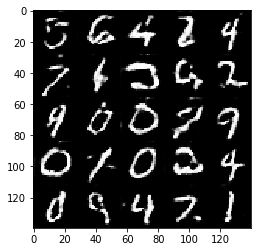

Epoch 2/2... Discriminator Loss: 0.5704... Generator Loss: 2.2312
Epoch 2/2... Discriminator Loss: 1.3366... Generator Loss: 0.5680
Epoch 2/2... Discriminator Loss: 0.9602... Generator Loss: 0.8748
Epoch 2/2... Discriminator Loss: 1.1580... Generator Loss: 3.2808
Epoch 2/2... Discriminator Loss: 0.7789... Generator Loss: 1.1263
Epoch 2/2... Discriminator Loss: 0.7380... Generator Loss: 1.2640
Epoch 2/2... Discriminator Loss: 1.0680... Generator Loss: 0.7905
Epoch 2/2... Discriminator Loss: 1.7200... Generator Loss: 0.3896
Epoch 2/2... Discriminator Loss: 0.5714... Generator Loss: 1.7505
Epoch 2/2... Discriminator Loss: 1.6677... Generator Loss: 0.4031


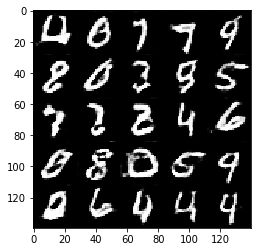

Epoch 2/2... Discriminator Loss: 1.1187... Generator Loss: 1.2135
Epoch 2/2... Discriminator Loss: 1.2514... Generator Loss: 0.5952
Epoch 2/2... Discriminator Loss: 0.8936... Generator Loss: 0.9933
Epoch 2/2... Discriminator Loss: 1.0752... Generator Loss: 0.7665
Epoch 2/2... Discriminator Loss: 2.3396... Generator Loss: 3.5279
Epoch 2/2... Discriminator Loss: 0.9440... Generator Loss: 0.9249
Epoch 2/2... Discriminator Loss: 0.7401... Generator Loss: 1.6579


In [30]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5123... Generator Loss: 10.8848
Epoch 1/1... Discriminator Loss: 0.5548... Generator Loss: 1.9652
Epoch 1/1... Discriminator Loss: 0.4186... Generator Loss: 4.6498
Epoch 1/1... Discriminator Loss: 1.0044... Generator Loss: 0.7944
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 5.1819
Epoch 1/1... Discriminator Loss: 0.8850... Generator Loss: 1.9200
Epoch 1/1... Discriminator Loss: 0.5597... Generator Loss: 2.5316
Epoch 1/1... Discriminator Loss: 1.0829... Generator Loss: 0.8990
Epoch 1/1... Discriminator Loss: 1.1892... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 2.8500... Generator Loss: 4.3048


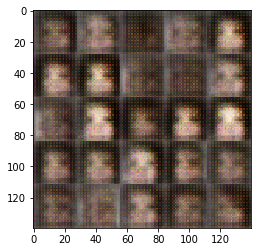

Epoch 1/1... Discriminator Loss: 0.7362... Generator Loss: 1.6293
Epoch 1/1... Discriminator Loss: 2.2710... Generator Loss: 0.7459
Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 0.9799
Epoch 1/1... Discriminator Loss: 0.6882... Generator Loss: 1.9638
Epoch 1/1... Discriminator Loss: 0.8069... Generator Loss: 2.0412
Epoch 1/1... Discriminator Loss: 0.6776... Generator Loss: 1.6052
Epoch 1/1... Discriminator Loss: 1.5543... Generator Loss: 0.9335
Epoch 1/1... Discriminator Loss: 0.9354... Generator Loss: 1.2573
Epoch 1/1... Discriminator Loss: 0.8297... Generator Loss: 1.4676
Epoch 1/1... Discriminator Loss: 0.6946... Generator Loss: 2.1135


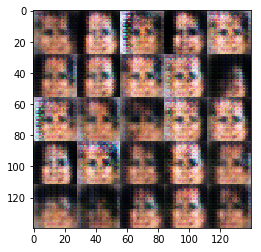

Epoch 1/1... Discriminator Loss: 1.0366... Generator Loss: 3.1903
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 0.8125
Epoch 1/1... Discriminator Loss: 1.7017... Generator Loss: 0.3530
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 1.1065
Epoch 1/1... Discriminator Loss: 0.7782... Generator Loss: 1.4145
Epoch 1/1... Discriminator Loss: 0.8135... Generator Loss: 1.1567
Epoch 1/1... Discriminator Loss: 0.8784... Generator Loss: 2.3535
Epoch 1/1... Discriminator Loss: 0.7540... Generator Loss: 1.2673
Epoch 1/1... Discriminator Loss: 0.9585... Generator Loss: 1.3009
Epoch 1/1... Discriminator Loss: 1.9511... Generator Loss: 5.4017


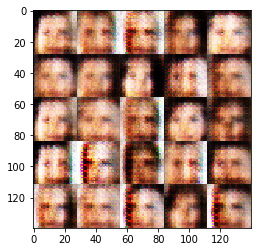

Epoch 1/1... Discriminator Loss: 0.7942... Generator Loss: 1.3835
Epoch 1/1... Discriminator Loss: 0.6805... Generator Loss: 1.6239
Epoch 1/1... Discriminator Loss: 0.7040... Generator Loss: 2.0615
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.5706
Epoch 1/1... Discriminator Loss: 0.7468... Generator Loss: 2.8854
Epoch 1/1... Discriminator Loss: 1.5698... Generator Loss: 5.5639
Epoch 1/1... Discriminator Loss: 0.8079... Generator Loss: 1.8266
Epoch 1/1... Discriminator Loss: 0.7269... Generator Loss: 1.5271
Epoch 1/1... Discriminator Loss: 0.7781... Generator Loss: 1.3480
Epoch 1/1... Discriminator Loss: 0.5676... Generator Loss: 2.1533


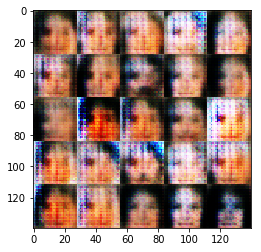

Epoch 1/1... Discriminator Loss: 0.4907... Generator Loss: 2.2341
Epoch 1/1... Discriminator Loss: 0.8804... Generator Loss: 1.1959
Epoch 1/1... Discriminator Loss: 0.6578... Generator Loss: 3.0050
Epoch 1/1... Discriminator Loss: 0.9122... Generator Loss: 4.7468
Epoch 1/1... Discriminator Loss: 0.7413... Generator Loss: 2.3496
Epoch 1/1... Discriminator Loss: 0.5762... Generator Loss: 2.3003
Epoch 1/1... Discriminator Loss: 0.5842... Generator Loss: 1.9736
Epoch 1/1... Discriminator Loss: 0.8183... Generator Loss: 2.9879
Epoch 1/1... Discriminator Loss: 0.5832... Generator Loss: 2.1955
Epoch 1/1... Discriminator Loss: 0.8783... Generator Loss: 1.2431


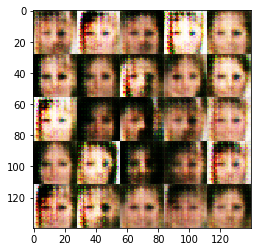

Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.7596
Epoch 1/1... Discriminator Loss: 0.7565... Generator Loss: 3.9658
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 4.8546
Epoch 1/1... Discriminator Loss: 1.4574... Generator Loss: 0.7254
Epoch 1/1... Discriminator Loss: 0.7872... Generator Loss: 3.1420
Epoch 1/1... Discriminator Loss: 0.5751... Generator Loss: 2.4733
Epoch 1/1... Discriminator Loss: 0.6893... Generator Loss: 2.7678
Epoch 1/1... Discriminator Loss: 0.7806... Generator Loss: 1.2593
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 4.3582
Epoch 1/1... Discriminator Loss: 2.5956... Generator Loss: 6.5991


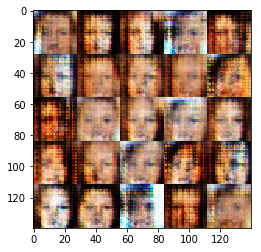

Epoch 1/1... Discriminator Loss: 0.5678... Generator Loss: 3.2290
Epoch 1/1... Discriminator Loss: 1.0897... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 0.5537... Generator Loss: 2.5002
Epoch 1/1... Discriminator Loss: 0.9568... Generator Loss: 1.2142
Epoch 1/1... Discriminator Loss: 0.6164... Generator Loss: 2.0009
Epoch 1/1... Discriminator Loss: 0.6699... Generator Loss: 1.8220
Epoch 1/1... Discriminator Loss: 0.9778... Generator Loss: 0.9004
Epoch 1/1... Discriminator Loss: 0.7966... Generator Loss: 3.2158
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 3.9127
Epoch 1/1... Discriminator Loss: 1.1531... Generator Loss: 0.7259


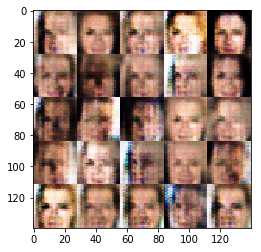

Epoch 1/1... Discriminator Loss: 0.6661... Generator Loss: 2.7680
Epoch 1/1... Discriminator Loss: 0.7735... Generator Loss: 1.4997
Epoch 1/1... Discriminator Loss: 0.8394... Generator Loss: 1.3415
Epoch 1/1... Discriminator Loss: 0.6695... Generator Loss: 2.4049
Epoch 1/1... Discriminator Loss: 1.4732... Generator Loss: 0.4583
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 0.8866... Generator Loss: 1.1431
Epoch 1/1... Discriminator Loss: 0.7677... Generator Loss: 3.3127
Epoch 1/1... Discriminator Loss: 0.6724... Generator Loss: 1.8697
Epoch 1/1... Discriminator Loss: 0.8964... Generator Loss: 0.9935


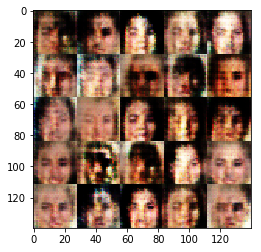

Epoch 1/1... Discriminator Loss: 0.8207... Generator Loss: 1.3133
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 2.7319
Epoch 1/1... Discriminator Loss: 0.7167... Generator Loss: 2.7048
Epoch 1/1... Discriminator Loss: 0.5639... Generator Loss: 2.5191
Epoch 1/1... Discriminator Loss: 0.7676... Generator Loss: 1.8711
Epoch 1/1... Discriminator Loss: 0.7189... Generator Loss: 1.4064
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 1.0073
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 5.2688
Epoch 1/1... Discriminator Loss: 0.7736... Generator Loss: 2.2473
Epoch 1/1... Discriminator Loss: 0.7478... Generator Loss: 3.0935


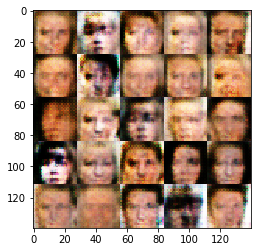

Epoch 1/1... Discriminator Loss: 0.6167... Generator Loss: 2.1838
Epoch 1/1... Discriminator Loss: 0.7781... Generator Loss: 1.6764
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.8622
Epoch 1/1... Discriminator Loss: 0.6669... Generator Loss: 1.8821
Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 1.3366
Epoch 1/1... Discriminator Loss: 0.7617... Generator Loss: 1.4826
Epoch 1/1... Discriminator Loss: 0.7795... Generator Loss: 1.4450
Epoch 1/1... Discriminator Loss: 0.8423... Generator Loss: 1.2672
Epoch 1/1... Discriminator Loss: 0.5543... Generator Loss: 1.9925
Epoch 1/1... Discriminator Loss: 0.6070... Generator Loss: 2.4923


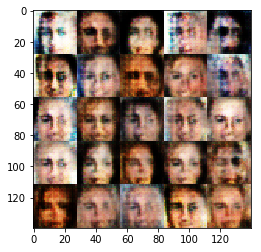

Epoch 1/1... Discriminator Loss: 0.5138... Generator Loss: 2.8987
Epoch 1/1... Discriminator Loss: 0.5595... Generator Loss: 2.2832
Epoch 1/1... Discriminator Loss: 0.9681... Generator Loss: 0.9687
Epoch 1/1... Discriminator Loss: 0.6761... Generator Loss: 1.8939
Epoch 1/1... Discriminator Loss: 0.7012... Generator Loss: 2.1930
Epoch 1/1... Discriminator Loss: 0.9386... Generator Loss: 0.9722
Epoch 1/1... Discriminator Loss: 0.8259... Generator Loss: 2.2395
Epoch 1/1... Discriminator Loss: 0.8322... Generator Loss: 1.1881
Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 0.7737... Generator Loss: 1.3630


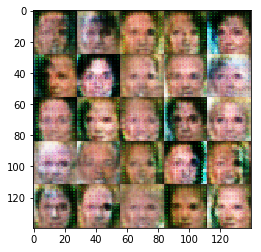

Epoch 1/1... Discriminator Loss: 0.6790... Generator Loss: 2.4368
Epoch 1/1... Discriminator Loss: 0.6523... Generator Loss: 1.9424
Epoch 1/1... Discriminator Loss: 1.0570... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 0.7748... Generator Loss: 1.2975
Epoch 1/1... Discriminator Loss: 0.6806... Generator Loss: 1.9817
Epoch 1/1... Discriminator Loss: 0.5887... Generator Loss: 2.2910
Epoch 1/1... Discriminator Loss: 0.9158... Generator Loss: 2.5069
Epoch 1/1... Discriminator Loss: 0.7780... Generator Loss: 2.8807
Epoch 1/1... Discriminator Loss: 1.1965... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 0.8104... Generator Loss: 1.3299


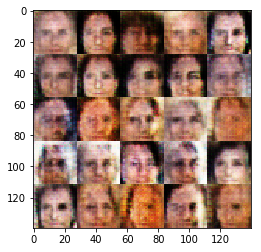

Epoch 1/1... Discriminator Loss: 0.7047... Generator Loss: 2.3639
Epoch 1/1... Discriminator Loss: 0.8264... Generator Loss: 1.1672
Epoch 1/1... Discriminator Loss: 0.7609... Generator Loss: 1.4202
Epoch 1/1... Discriminator Loss: 0.8315... Generator Loss: 3.3128
Epoch 1/1... Discriminator Loss: 0.8280... Generator Loss: 1.1443
Epoch 1/1... Discriminator Loss: 1.4012... Generator Loss: 0.5309
Epoch 1/1... Discriminator Loss: 0.6892... Generator Loss: 1.6759
Epoch 1/1... Discriminator Loss: 0.6417... Generator Loss: 1.6384
Epoch 1/1... Discriminator Loss: 0.6630... Generator Loss: 1.6357
Epoch 1/1... Discriminator Loss: 0.6850... Generator Loss: 1.6375


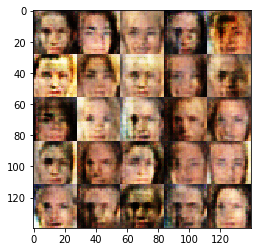

Epoch 1/1... Discriminator Loss: 1.1331... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 0.8484... Generator Loss: 1.1929
Epoch 1/1... Discriminator Loss: 0.9529... Generator Loss: 3.4063
Epoch 1/1... Discriminator Loss: 0.6119... Generator Loss: 2.6060
Epoch 1/1... Discriminator Loss: 1.1533... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 0.8161... Generator Loss: 3.6311
Epoch 1/1... Discriminator Loss: 0.8225... Generator Loss: 3.3902
Epoch 1/1... Discriminator Loss: 0.8452... Generator Loss: 4.7495
Epoch 1/1... Discriminator Loss: 0.5787... Generator Loss: 2.2410


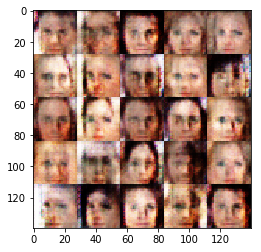

Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 0.9182
Epoch 1/1... Discriminator Loss: 0.7069... Generator Loss: 1.9547
Epoch 1/1... Discriminator Loss: 0.7515... Generator Loss: 1.4933
Epoch 1/1... Discriminator Loss: 0.7405... Generator Loss: 1.8746
Epoch 1/1... Discriminator Loss: 0.7199... Generator Loss: 1.4043
Epoch 1/1... Discriminator Loss: 2.4659... Generator Loss: 0.1737
Epoch 1/1... Discriminator Loss: 0.7667... Generator Loss: 1.3124
Epoch 1/1... Discriminator Loss: 0.9733... Generator Loss: 0.8908
Epoch 1/1... Discriminator Loss: 0.8353... Generator Loss: 1.1929
Epoch 1/1... Discriminator Loss: 1.5525... Generator Loss: 4.7696


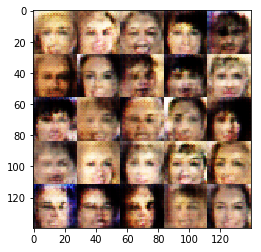

Epoch 1/1... Discriminator Loss: 0.7088... Generator Loss: 3.0252
Epoch 1/1... Discriminator Loss: 0.6859... Generator Loss: 3.1439
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 0.6985... Generator Loss: 1.8581
Epoch 1/1... Discriminator Loss: 0.6062... Generator Loss: 1.9830
Epoch 1/1... Discriminator Loss: 0.6477... Generator Loss: 2.2529
Epoch 1/1... Discriminator Loss: 0.7696... Generator Loss: 2.0862
Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 1.1155
Epoch 1/1... Discriminator Loss: 0.7995... Generator Loss: 2.8411
Epoch 1/1... Discriminator Loss: 0.8046... Generator Loss: 1.2020


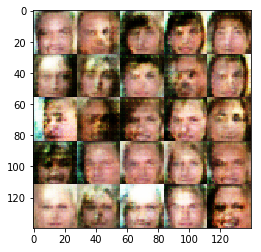

Epoch 1/1... Discriminator Loss: 0.6970... Generator Loss: 2.8953
Epoch 1/1... Discriminator Loss: 0.9724... Generator Loss: 0.9527
Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 4.2699
Epoch 1/1... Discriminator Loss: 0.8188... Generator Loss: 1.2110
Epoch 1/1... Discriminator Loss: 0.5660... Generator Loss: 2.0301
Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 0.5770... Generator Loss: 2.5204
Epoch 1/1... Discriminator Loss: 0.7198... Generator Loss: 1.6566
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 2.3787
Epoch 1/1... Discriminator Loss: 0.7169... Generator Loss: 1.6679


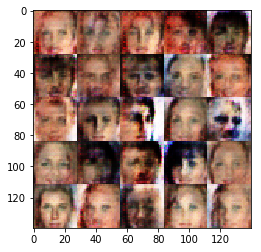

Epoch 1/1... Discriminator Loss: 0.7245... Generator Loss: 1.5034
Epoch 1/1... Discriminator Loss: 0.7929... Generator Loss: 2.4632
Epoch 1/1... Discriminator Loss: 1.1194... Generator Loss: 0.7881
Epoch 1/1... Discriminator Loss: 0.8282... Generator Loss: 1.3018
Epoch 1/1... Discriminator Loss: 0.7002... Generator Loss: 1.5341
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.8278
Epoch 1/1... Discriminator Loss: 0.7945... Generator Loss: 1.2791
Epoch 1/1... Discriminator Loss: 0.6968... Generator Loss: 2.2578
Epoch 1/1... Discriminator Loss: 0.8428... Generator Loss: 1.1361
Epoch 1/1... Discriminator Loss: 0.8778... Generator Loss: 1.1807


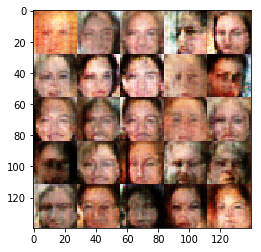

Epoch 1/1... Discriminator Loss: 0.7203... Generator Loss: 1.3407
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 3.8536
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 0.8822
Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 0.8798
Epoch 1/1... Discriminator Loss: 0.9163... Generator Loss: 0.9567
Epoch 1/1... Discriminator Loss: 1.2302... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 0.9998... Generator Loss: 0.8901
Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 1.0379
Epoch 1/1... Discriminator Loss: 0.8772... Generator Loss: 1.6012
Epoch 1/1... Discriminator Loss: 0.6396... Generator Loss: 1.6902


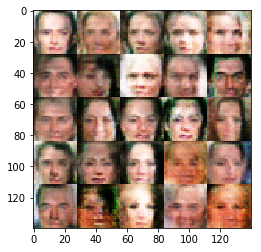

Epoch 1/1... Discriminator Loss: 0.6336... Generator Loss: 1.6610
Epoch 1/1... Discriminator Loss: 0.6937... Generator Loss: 1.7851
Epoch 1/1... Discriminator Loss: 0.8055... Generator Loss: 1.2288
Epoch 1/1... Discriminator Loss: 0.8690... Generator Loss: 1.1087
Epoch 1/1... Discriminator Loss: 0.6341... Generator Loss: 1.5504
Epoch 1/1... Discriminator Loss: 0.7417... Generator Loss: 1.3693
Epoch 1/1... Discriminator Loss: 0.8550... Generator Loss: 1.2068
Epoch 1/1... Discriminator Loss: 0.6667... Generator Loss: 2.6159
Epoch 1/1... Discriminator Loss: 0.8091... Generator Loss: 1.2758
Epoch 1/1... Discriminator Loss: 0.8116... Generator Loss: 3.3528


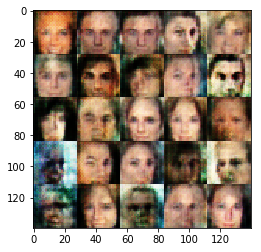

Epoch 1/1... Discriminator Loss: 0.8589... Generator Loss: 1.1270
Epoch 1/1... Discriminator Loss: 0.5734... Generator Loss: 2.0087
Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 1.0957
Epoch 1/1... Discriminator Loss: 0.7533... Generator Loss: 1.3434
Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 1.6193
Epoch 1/1... Discriminator Loss: 0.7242... Generator Loss: 1.4488
Epoch 1/1... Discriminator Loss: 0.9537... Generator Loss: 0.9196
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 2.1967
Epoch 1/1... Discriminator Loss: 0.8664... Generator Loss: 1.1104
Epoch 1/1... Discriminator Loss: 0.6599... Generator Loss: 1.6958


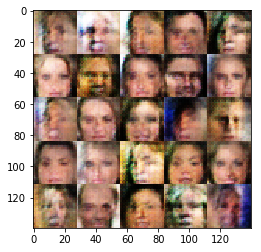

Epoch 1/1... Discriminator Loss: 0.8874... Generator Loss: 1.0676
Epoch 1/1... Discriminator Loss: 0.6665... Generator Loss: 2.1806
Epoch 1/1... Discriminator Loss: 0.6665... Generator Loss: 1.5991
Epoch 1/1... Discriminator Loss: 0.7372... Generator Loss: 2.7504
Epoch 1/1... Discriminator Loss: 1.1741... Generator Loss: 4.1759
Epoch 1/1... Discriminator Loss: 0.7464... Generator Loss: 2.3936
Epoch 1/1... Discriminator Loss: 0.9605... Generator Loss: 4.6373
Epoch 1/1... Discriminator Loss: 0.8001... Generator Loss: 2.4524
Epoch 1/1... Discriminator Loss: 1.2361... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 0.6574... Generator Loss: 2.4375


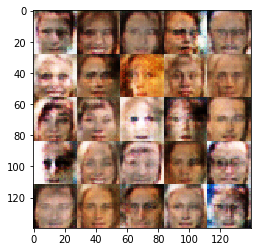

Epoch 1/1... Discriminator Loss: 1.1022... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 0.4899... Generator Loss: 2.6096
Epoch 1/1... Discriminator Loss: 0.7574... Generator Loss: 2.0968
Epoch 1/1... Discriminator Loss: 0.8321... Generator Loss: 1.5506
Epoch 1/1... Discriminator Loss: 0.5967... Generator Loss: 2.6755
Epoch 1/1... Discriminator Loss: 0.8113... Generator Loss: 1.1712
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 3.2621
Epoch 1/1... Discriminator Loss: 0.8721... Generator Loss: 2.1985
Epoch 1/1... Discriminator Loss: 0.7364... Generator Loss: 2.4078
Epoch 1/1... Discriminator Loss: 0.5848... Generator Loss: 2.0922


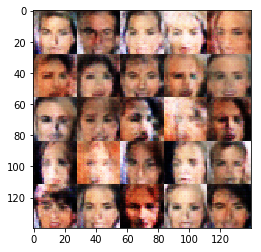

Epoch 1/1... Discriminator Loss: 0.8972... Generator Loss: 1.0702
Epoch 1/1... Discriminator Loss: 1.1734... Generator Loss: 3.2921
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.5318
Epoch 1/1... Discriminator Loss: 0.9454... Generator Loss: 1.0864
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 1.2027
Epoch 1/1... Discriminator Loss: 0.8282... Generator Loss: 1.1434
Epoch 1/1... Discriminator Loss: 1.0385... Generator Loss: 0.8279
Epoch 1/1... Discriminator Loss: 0.7411... Generator Loss: 2.3454
Epoch 1/1... Discriminator Loss: 0.9811... Generator Loss: 0.8965
Epoch 1/1... Discriminator Loss: 0.5890... Generator Loss: 1.8015


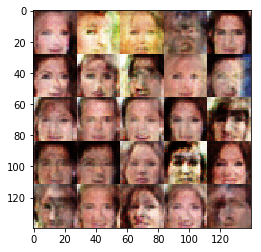

Epoch 1/1... Discriminator Loss: 0.8193... Generator Loss: 1.9313
Epoch 1/1... Discriminator Loss: 0.7533... Generator Loss: 1.3475
Epoch 1/1... Discriminator Loss: 0.6268... Generator Loss: 1.8451
Epoch 1/1... Discriminator Loss: 0.6315... Generator Loss: 2.2885
Epoch 1/1... Discriminator Loss: 0.6853... Generator Loss: 1.4603
Epoch 1/1... Discriminator Loss: 1.1020... Generator Loss: 0.7387
Epoch 1/1... Discriminator Loss: 0.8368... Generator Loss: 1.2067
Epoch 1/1... Discriminator Loss: 0.8326... Generator Loss: 1.1361
Epoch 1/1... Discriminator Loss: 0.8375... Generator Loss: 1.0972
Epoch 1/1... Discriminator Loss: 0.6297... Generator Loss: 1.8164


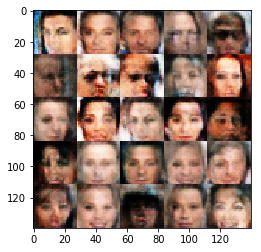

Epoch 1/1... Discriminator Loss: 0.7216... Generator Loss: 2.2696
Epoch 1/1... Discriminator Loss: 0.6868... Generator Loss: 1.9283
Epoch 1/1... Discriminator Loss: 0.5796... Generator Loss: 2.5470
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 4.3283
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 0.7787... Generator Loss: 1.7599
Epoch 1/1... Discriminator Loss: 1.4062... Generator Loss: 4.5751
Epoch 1/1... Discriminator Loss: 0.6620... Generator Loss: 1.5835
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 0.8872
Epoch 1/1... Discriminator Loss: 0.7928... Generator Loss: 1.2510


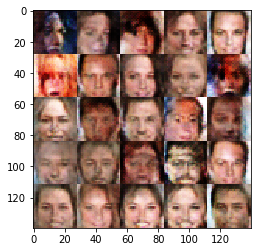

Epoch 1/1... Discriminator Loss: 0.6206... Generator Loss: 1.7853
Epoch 1/1... Discriminator Loss: 0.6179... Generator Loss: 2.3702
Epoch 1/1... Discriminator Loss: 1.5252... Generator Loss: 4.0586
Epoch 1/1... Discriminator Loss: 0.5984... Generator Loss: 1.7848
Epoch 1/1... Discriminator Loss: 0.6851... Generator Loss: 2.6653
Epoch 1/1... Discriminator Loss: 1.4525... Generator Loss: 4.7674
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 3.8053
Epoch 1/1... Discriminator Loss: 0.7106... Generator Loss: 1.4130
Epoch 1/1... Discriminator Loss: 0.8014... Generator Loss: 1.2025
Epoch 1/1... Discriminator Loss: 0.8320... Generator Loss: 1.1458


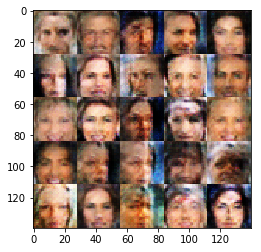

Epoch 1/1... Discriminator Loss: 0.6181... Generator Loss: 2.0017
Epoch 1/1... Discriminator Loss: 1.0687... Generator Loss: 0.8492
Epoch 1/1... Discriminator Loss: 1.6051... Generator Loss: 0.4216
Epoch 1/1... Discriminator Loss: 0.5713... Generator Loss: 2.6284
Epoch 1/1... Discriminator Loss: 0.6496... Generator Loss: 1.7897
Epoch 1/1... Discriminator Loss: 0.9920... Generator Loss: 2.7794
Epoch 1/1... Discriminator Loss: 0.9836... Generator Loss: 0.8845
Epoch 1/1... Discriminator Loss: 0.7682... Generator Loss: 1.3708
Epoch 1/1... Discriminator Loss: 0.7323... Generator Loss: 1.6688
Epoch 1/1... Discriminator Loss: 0.5931... Generator Loss: 1.8866


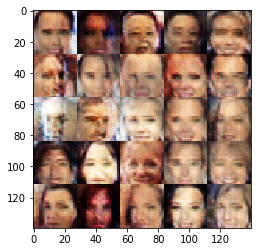

Epoch 1/1... Discriminator Loss: 1.0216... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.5868
Epoch 1/1... Discriminator Loss: 1.2371... Generator Loss: 0.7214
Epoch 1/1... Discriminator Loss: 0.6532... Generator Loss: 2.0108
Epoch 1/1... Discriminator Loss: 0.7149... Generator Loss: 2.0154
Epoch 1/1... Discriminator Loss: 0.8928... Generator Loss: 2.8604
Epoch 1/1... Discriminator Loss: 0.7932... Generator Loss: 1.6304
Epoch 1/1... Discriminator Loss: 0.6502... Generator Loss: 1.5702
Epoch 1/1... Discriminator Loss: 0.7278... Generator Loss: 1.3181
Epoch 1/1... Discriminator Loss: 0.7659... Generator Loss: 1.2945


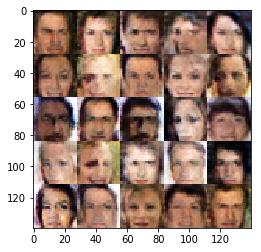

Epoch 1/1... Discriminator Loss: 0.8869... Generator Loss: 2.4476
Epoch 1/1... Discriminator Loss: 0.8010... Generator Loss: 2.6330
Epoch 1/1... Discriminator Loss: 0.8265... Generator Loss: 2.1433
Epoch 1/1... Discriminator Loss: 0.7302... Generator Loss: 1.4289
Epoch 1/1... Discriminator Loss: 0.9128... Generator Loss: 0.9277
Epoch 1/1... Discriminator Loss: 0.7115... Generator Loss: 1.5150
Epoch 1/1... Discriminator Loss: 0.7908... Generator Loss: 1.7662
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.5541
Epoch 1/1... Discriminator Loss: 0.9235... Generator Loss: 4.1574
Epoch 1/1... Discriminator Loss: 1.3267... Generator Loss: 0.5877


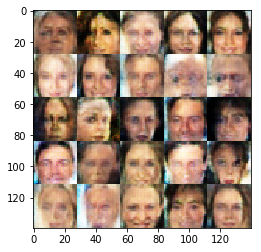

Epoch 1/1... Discriminator Loss: 0.8657... Generator Loss: 1.1463
Epoch 1/1... Discriminator Loss: 0.7000... Generator Loss: 1.4828
Epoch 1/1... Discriminator Loss: 0.6769... Generator Loss: 1.8657
Epoch 1/1... Discriminator Loss: 0.8094... Generator Loss: 1.1324
Epoch 1/1... Discriminator Loss: 0.8681... Generator Loss: 1.0542
Epoch 1/1... Discriminator Loss: 0.9212... Generator Loss: 0.9591
Epoch 1/1... Discriminator Loss: 0.6310... Generator Loss: 1.7723
Epoch 1/1... Discriminator Loss: 0.8885... Generator Loss: 1.0650
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 3.0795
Epoch 1/1... Discriminator Loss: 1.2011... Generator Loss: 0.6069


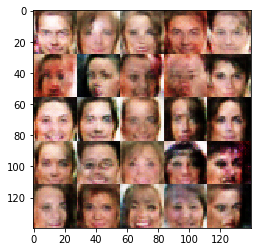

Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.5428
Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 2.2007
Epoch 1/1... Discriminator Loss: 0.9674... Generator Loss: 0.8997
Epoch 1/1... Discriminator Loss: 0.7817... Generator Loss: 1.8582
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 2.5144


In [31]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.